In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("netflix_data.csv")

##### 1. head()

In [3]:
df.head()

,Show_Id,Category,Title,Director,Cast,Country,Release_Date,Rating,Duration,Type,Description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,07:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",PG-13,123 min,Dramas,A brilliant group of students become card-coun...


##### 2. tail()

In [4]:
df.tail()

,Show_Id,Category,Title,Director,Cast,Country,Release_Date,Rating,Duration,Type,Description
7784,s7783,Movie,Zozo,Josef Fares,"Imad Creidi, Antoinette Turk, Elias Gergi, Car...","Sweden, Czech Republic, United Kingdom, Denmar...","October 19, 2020",TV-MA,99 min,"Dramas, International Movies",When Lebanon's Civil War deprives Zozo of his ...
7785,s7784,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,"March 2, 2019",TV-14,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...
7786,s7785,Movie,Zulu Man in Japan,NaN,Nasty C,NaN,"September 25, 2020",TV-MA,44 min,"Documentaries, International Movies, Music & M...","In this documentary, South African rapper Nast..."
7787,s7786,TV Show,Zumbo's Just Desserts,NaN,"Adriano Zumbo, Rachel Khoo",Australia,"October 31, 2020",TV-PG,1 Season,"International TV Shows, Reality TV",Dessert wizard Adriano Zumbo looks for the nex...
7788,s7787,Movie,ZZ TOP: THAT LITTLE OL' BAND FROM TEXAS,Sam Dunn,NaN,"United Kingdom, Canada, United States","March 1, 2020",TV-MA,90 min,"Documentaries, Music & Musicals",This documentary delves into the mystique behi...


##### 3. shape

In [5]:
df.shape

(7789, 11)

##### 4. size

In [6]:
df.size

85679

##### 5. columns

In [7]:
df.columns

Index(['Show_Id', 'Category', 'Title', 'Director', 'Cast', 'Country',
       'Release_Date', 'Rating', 'Duration', 'Type', 'Description'],
      dtype='object')

##### 6. Check and drop duplicate rows

In [8]:
df.duplicated().value_counts()

False    7787
True        2
dtype: int64

In [9]:
df.drop_duplicates(inplace=True)

##### 7. Use heat-map to show null values count in seaborn.

<AxesSubplot:>

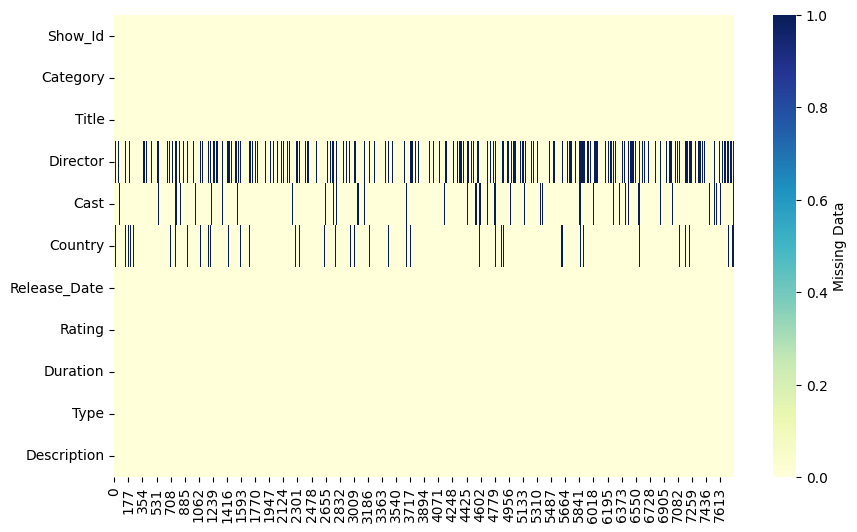

In [16]:
plt.figure(figsize=(10,6))
sns.heatmap(df.isna().transpose(),
            cmap="YlGnBu",
            cbar_kws={'label': 'Missing Data'})

##### 8. For 'House of Cards', what is the Show Id and who is the director of this show?

##### a. isin()

In [21]:
df.loc[df["Title"].isin(["House of Cards"]), ["Show_Id", "Director"]]

,Show_Id,Director
2832,s2833,"Robin Wright, David Fincher, Gerald McRaney, J..."


##### b. str.contains()

In [24]:
df.loc[df["Title"].str.contains("House of Cards"), ["Show_Id", "Director"]]

,Show_Id,Director
2832,s2833,"Robin Wright, David Fincher, Gerald McRaney, J..."


##### 9. In which year highest number of the TV shows & Movies were released? Show with Bar Graph.

##### a. dtypes

In [26]:
df.dtypes

Show_Id         object
Category        object
Title           object
Director        object
Cast            object
Country         object
Release_Date    object
Rating          object
Duration        object
Type            object
Description     object
dtype: object

##### b. to_datetime()

In [34]:
df["Release_Date"] = pd.to_datetime(df["Release_Date"])
df["Release_Date"]

0      2020-08-14
1      2016-12-23
2      2018-12-20
3      2017-11-16
4      2020-01-01
          ...    
7784   2020-10-19
7785   2019-03-02
7786   2020-09-25
7787   2020-10-31
7788   2020-03-01
Name: Release_Date, Length: 7787, dtype: datetime64[ns]

##### c. dt.year.value_counts()

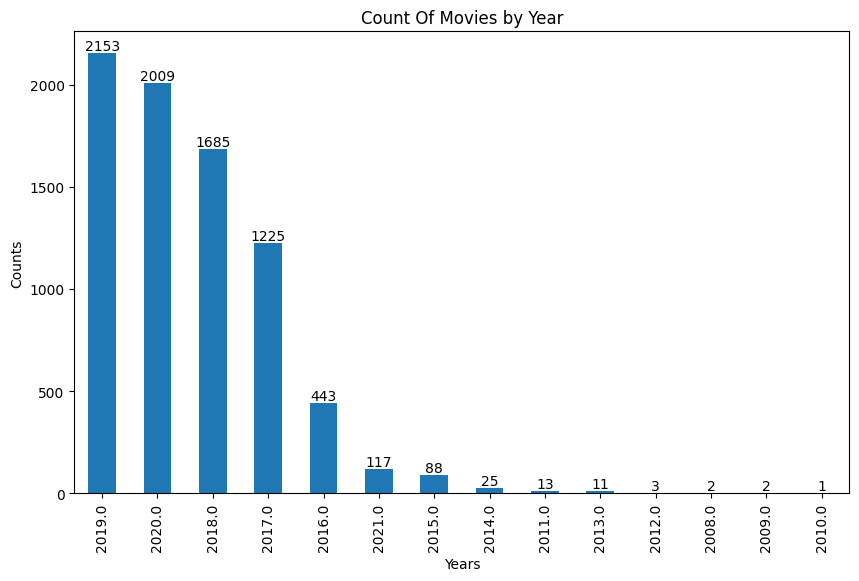

In [48]:
plt.figure(figsize=(10, 6))
ax = df["Release_Date"].dt.year.value_counts().plot(kind="bar")
for i in ax.containers:
    ax.bar_label(i)

plt.title("Count Of Movies by Year")
plt.xlabel("Years")
plt.ylabel("Counts");

##### 10. How many Movies & TV shows are in the dataset? Show with Bar Graph.

##### a. groupby()

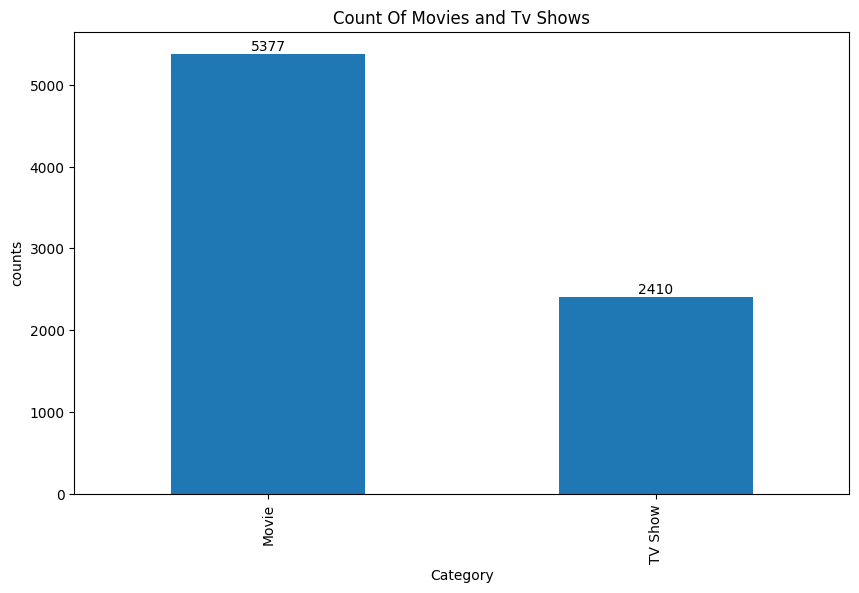

In [60]:



plt.figure(figsize=(10, 6))
ax = df.groupby("Category")["Show_Id"].count().plot(kind="bar")
for i in ax.containers:
    ax.bar_label(i)

plt.title("Count Of Movies and Tv Shows")
plt.xlabel("Category")
plt.ylabel("counts");

##### b. countplot()

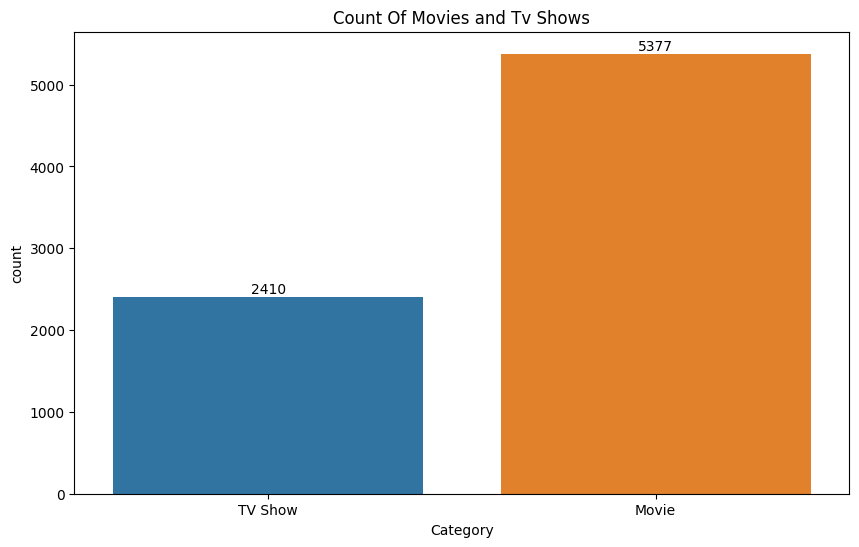

In [67]:
plt.figure(figsize=(10, 6))
ax = sns.countplot(data = df,  x = "Category")
for i in ax.containers:
    ax.bar_label(i)

plt.title("Count Of Movies and Tv Shows")
plt.show()

##### 11. Show all the Movies that were released in year 2020.

##### a. Create new column

In [76]:
df["Release_Year"] = df["Release_Date"].dt.year

##### b. Filter

In [83]:
df[df["Release_Year"] == 2020]

,Show_Id,Category,Title,Director,Cast,Country,Release_Date,Rating,Duration,Type,Description,Release_Year
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,2020-08-14,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...,2020.0
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,2020-01-01,PG-13,123 min,Dramas,A brilliant group of students become card-coun...,2020.0
6,s7,Movie,122,Yasir Al Yasiri,"Amina Khalil, Ahmed Dawood, Tarek Lotfy, Ahmed...",Egypt,2020-06-01,TV-MA,95 min,"Horror Movies, International Movies","After an awful accident, a couple admitted to ...",2020.0
14,s15,Movie,3022,John Suits,"Omar Epps, Kate Walsh, Miranda Cosgrove, Angus...",United States,2020-03-19,R,91 min,"Independent Movies, Sci-Fi & Fantasy, Thrillers",Stranded when the Earth is suddenly destroyed ...,2020.0
24,s25,TV Show,​SAINT SEIYA: Knights of the Zodiac,NaN,"Bryson Baugus, Emily Neves, Blake Shepard, Pat...",Japan,2020-01-23,TV-14,2 Seasons,"Anime Series, International TV Shows",Seiya and the Knights of the Zodiac rise again...,2020.0
...,...,...,...,...,...,...,...,...,...,...,...,...
7783,s7782,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,2020-01-11,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero...",2020.0
7784,s7783,Movie,Zozo,Josef Fares,"Imad Creidi, Antoinette Turk, Elias Gergi, Car...","Sweden, Czech Republic, United Kingdom, Denmar...",2020-10-19,TV-MA,99 min,"Dramas, International Movies",When Lebanon's Civil War deprives Zozo of his ...,2020.0
7786,s7785,Movie,Zulu Man in Japan,NaN,Nasty C,NaN,2020-09-25,TV-MA,44 min,"Documentaries, International Movies, Music & M...","In this documentary, South African rapper Nast...",2020.0
7787,s7786,TV Show,Zumbo's Just Desserts,NaN,"Adriano Zumbo, Rachel Khoo",Australia,2020-10-31,TV-PG,1 Season,"International TV Shows, Reality TV",Dessert wizard Adriano Zumbo looks for the nex...,2020.0


##### 12. Show only the Titles of all TV shows that were released in Turkey only.

In [86]:
df.loc[(df["Category"] == "TV Show") & (df["Country"] == "Turkey"), "Title"].values

array(['46', 'Şubat', '20 Minutes', 'Behzat Ç.', 'Black Heart',
       'Black Money Love', 'Burned Cocoon', 'Ethos', 'Ezel', 'Filinta',
       'Gonul', 'Immortals', 'Innocent', 'Intersection', 'Kaçak',
       'Kurt Seyit & Sura', 'Leyla and Mecnun', 'Love 101',
       'Love Me As I Am', 'Resurrection: Ertugrul', 'The Gift',
       'The Protector', 'The Yard', 'What Happens to My Family',
       'Winter Sun', 'Wolf', 'Yunus Emre'], dtype=object)

#####  13. Show Top 10 directors, who gave the highest number of TV Shows & Movies to Netflix?

In [101]:
df.groupby("Director")["Cast"].count().reset_index(name="Count").sort_values(by="Count", ascending=False)[:10]

,Director,Count
3078,"Raúl Campos, Jan Suter",18
2321,Marcus Raboy,16
1607,Jay Karas,14
624,Cathy Garcia-Molina,13
1604,Jay Chapman,12
2388,Martin Scorsese,12
4008,Youssef Chahine,12
3600,Steven Spielberg,10
875,David Dhawan,9
2079,Kunle Afolayan,8


##### 14. Show all the records, where 'Category is Movie and Type is Comedies' or 'Country is United Kindgom'.

In [102]:
df.loc[(df["Category"] == "Movie") & (df["Type"] == "Comedies") | (df["Country"] == "Comedies")]

,Show_Id,Category,Title,Director,Cast,Country,Release_Date,Rating,Duration,Type,Description,Release_Year
33,s34,Movie,#realityhigh,Fernando Lebrija,"Nesta Cooper, Kate Walsh, John Michael Higgins...",United States,2017-09-08,TV-14,99 min,Comedies,When nerdy high schooler Dani finally attracts...,2017.0
72,s73,Movie,17 Again,Burr Steers,"Zac Efron, Leslie Mann, Matthew Perry, Thomas ...",United States,2021-01-01,PG-13,102 min,Comedies,"Nearing a midlife crisis, thirty-something Mik...",2021.0
84,s85,Movie,21 & Over,"Jon Lucas, Scott Moore","Miles Teller, Skylar Astin, Justin Chon, Sarah...",United States,2019-04-16,R,93 min,Comedies,Jeff's straight-and-narrow life changes abrupt...,2019.0
148,s149,Movie,A Bad Moms Christmas,"Jon Lucas, Scott Moore","Mila Kunis, Kristen Bell, Kathryn Hahn, Susan ...","United States, China",2020-02-14,R,104 min,Comedies,"Stressed-out moms Amy, Carla and Kiki are back...",2020.0
174,s175,Movie,A Futile and Stupid Gesture,David Wain,"Will Forte, Domhnall Gleeson, Martin Mull, Joe...",United States,2018-01-26,TV-MA,102 min,Comedies,"In a brief life full of triumph and failure, ""...",2018.0
...,...,...,...,...,...,...,...,...,...,...,...,...
7341,s7340,Movie,Undercover Brother 2,Leslie Small,"Michael Jai White, Vince Swann, Barry Bostwick...",United States,2019-11-05,R,85 min,Comedies,When a beloved secret agent falls deep into a ...,2019.0
7590,s7589,Movie,Where's the Money,Scott Zabielski,"Andrew Bachelor, Kat Graham, Mike Epps, Terry ...",United States,2018-01-22,R,86 min,Comedies,"Hunting for a stash of stolen money, a sharp-w...",2018.0
7623,s7622,Movie,Wild Oats,Andy Tennant,"Shirley MacLaine, Jessica Lange, Billy Connoll...","Germany, United States",2017-05-13,PG-13,86 min,Comedies,"When insurance accidentally pays her millions,...",2017.0
7634,s7633,Movie,Wine Country,Amy Poehler,"Amy Poehler, Maya Rudolph, Ana Gasteyer, Rache...",United States,2019-05-10,R,104 min,Comedies,When longtime friends meet up for a wine-soake...,2019.0


##### 15. In how many movies / shows, Tom Cruise was cast?

In [130]:
df[df["Cast"].astype("str").str.contains("Tom Cruise")]

,Show_Id,Category,Title,Director,Cast,Country,Release_Date,Rating,Duration,Type,Description,Release_Year
3860,s3861,Movie,Magnolia,Paul Thomas Anderson,"Jeremy Blackman, Tom Cruise, Melinda Dillon, A...",United States,2020-01-01,R,189 min,"Dramas, Independent Movies","Through chance, human action, past history and...",2020.0
5071,s5071,Movie,Rain Man,Barry Levinson,"Dustin Hoffman, Tom Cruise, Valeria Golino, Ge...",United States,2019-07-01,R,134 min,"Classic Movies, Dramas",A fast-talking yuppie is forced to slow down w...,2019.0


##### 16. What are the different Ratings defined by Netflix?

##### a. nunique()

In [132]:
df["Rating"].nunique()

14

##### b. unique()

In [133]:
df["Rating"].unique()

array(['TV-MA', 'R', 'PG-13', 'TV-14', 'TV-PG', 'NR', 'TV-G', 'TV-Y', nan,
       'TV-Y7', 'PG', 'G', 'NC-17', 'TV-Y7-FV', 'UR'], dtype=object)

##### 17. How many movies got the 'TV-14' rating, in Canada?

In [141]:
df[(df["Rating"] == "TV-14") & (df["Country"] == "Canada")].count()[0]

23

##### 18. How many TV shows got the 'R' rating, after year 2018?

In [146]:
df.loc[(df["Release_Year"] > 2018) & (df["Rating"] == "R")].count()[0]

450

##### 19. What is the maximum duration of a movie / show on Netflix?

##### a. str.split()

In [161]:
df["Duration"].str.split().str[0].astype("int").max()

312

##### b. max()

In [163]:
df["Duration"].str.split().str[0].astype("int").max()

312

##### 20. Which individual country has the highest number of TV Shows?

In [171]:
df.groupby("Country")["Show_Id"].count().reset_index(name="Count").sort_values(by = "Count", ascending=False)

,Country,Count
549,United States,2555
229,India,923
462,United Kingdom,397
291,Japan,226
394,South Korea,183
...,...,...
252,"Indonesia, South Korea, Singapore",1
253,"Indonesia, United Kingdom",1
254,"Indonesia, United States",1
255,"Iran, France",1


##### 21. How can we sort the dataset by Year?

In [173]:
df.sort_values(by="Release_Year")

,Show_Id,Category,Title,Director,Cast,Country,Release_Date,Rating,Duration,Type,Description,Release_Year
7115,s7114,Movie,To and From New York,Sorin Dan Mihalcescu,"Barbara King, Shaana Diya, John Krisiukenas, Y...",United States,2008-01-01,TV-MA,81 min,"Dramas, Independent Movies, Thrillers","While covering a story in New York City, a Sea...",2008.0
1765,s1766,TV Show,Dinner for Five,NaN,NaN,United States,2008-02-04,TV-MA,1 Season,Stand-Up Comedy & Talk Shows,"In each episode, four celebrities join host Jo...",2008.0
3248,s3249,Movie,Just Another Love Story,Ole Bornedal,"Anders W. Berthelsen, Rebecka Hemse, Nikolaj L...",Denmark,2009-05-05,TV-MA,104 min,"Dramas, International Movies",When he causes a car accident that leaves a yo...,2009.0
5766,s5766,Movie,Splatter,Joe Dante,"Corey Feldman, Tony Todd, Tara Leigh, Erin Way...",United States,2009-11-18,TV-MA,29 min,Horror Movies,"After committing suicide, a washed-up rocker r...",2009.0
3840,s3841,Movie,Mad Ron's Prevues from Hell,Jim Monaco,"Nick Pawlow, Jordu Schell, Jay Kushwara, Micha...",United States,2010-11-01,NR,84 min,"Cult Movies, Horror Movies","This collection cherry-picks trailers, forgott...",2010.0
...,...,...,...,...,...,...,...,...,...,...,...,...
3374,s3375,TV Show,Kikoriki,NaN,Igor Dmitriev,NaN,NaT,TV-Y,2 Seasons,Kids' TV,A wacky rabbit and his gang of animal pals hav...,NaN
3492,s3493,TV Show,La Familia P. Luche,NaN,"Eugenio Derbez, Consuelo Duval, Luis Manuel Áv...",United States,NaT,TV-14,3 Seasons,"International TV Shows, Spanish-Language TV Sh...","This irreverent sitcom featues Ludovico, Feder...",NaN
3946,s3947,TV Show,Maron,NaN,"Marc Maron, Judd Hirsch, Josh Brener, Nora Zeh...",United States,NaT,TV-MA,4 Seasons,TV Comedies,"Marc Maron stars as Marc Maron, who interviews...",NaN
5138,s5138,TV Show,Red vs. Blue,NaN,"Burnie Burns, Jason Saldaña, Gustavo Sorola, G...",United States,NaT,NR,13 Seasons,"TV Action & Adventure, TV Comedies, TV Sci-Fi ...","This parody of first-person shooter games, mil...",NaN


##### 22. Find all the instances where: 
Category is 'Movie' and Type is 'Dramas' or Category is 'TV Show' and Type is 'Kids TV'

In [174]:
df.loc[((df["Category"] == "Movie") & (df["Type"] == "Dramas")) | ((df["Category"] == "TV Show") & (df["Type"] == "Kids TV"))] 

,Show_Id,Category,Title,Director,Cast,Country,Release_Date,Rating,Duration,Type,Description,Release_Year
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,2020-01-01,PG-13,123 min,Dramas,A brilliant group of students become card-coun...,2020.0
7,s8,Movie,187,Kevin Reynolds,"Samuel L. Jackson, John Heard, Kelly Rowan, Cl...",United States,2019-11-01,R,119 min,Dramas,After one of his high school students attacks ...,2019.0
170,s171,Movie,A Family Man,Mark Williams,"Gerard Butler, Gretchen Mol, Alison Brie, Will...","Canada, United States",2019-12-15,R,110 min,Dramas,A ruthless corporate headhunter battles his ri...,2019.0
232,s233,Movie,A Stoning in Fulham County,Larry Elikann,"Ken Olin, Jill Eikenberry, Maureen Mueller, Gr...",United States,2011-10-01,TV-14,95 min,Dramas,"After reckless teens kill an Amish child, a pr...",2011.0
295,s296,Movie,Across Grace Alley,Ralph Macchio,"Ben Hyland, Marsha Mason, Karina Smirnoff, Col...",United States,2016-12-01,TV-PG,24 min,Dramas,"A young boy, upset by his parents' divorce, be...",2016.0
...,...,...,...,...,...,...,...,...,...,...,...,...
7417,s7416,Movie,Victor,Brandon Dickerson,"Patrick Davis, Lisa Vidal, Josh Pence, José Zú...",United States,2017-07-24,PG-13,110 min,Dramas,"In 1962 Brooklyn, a Puerto Rican teen who join...",2017.0
7422,s7421,Movie,Villain,Philip Barantini,"Craig Fairbrass, George Russo, Robert Gleniste...",United Kingdom,2020-09-05,R,97 min,Dramas,"Fresh out of prison, an ex-con tries to save h...",2020.0
7449,s7448,Movie,VS.,Ed Lilly,"Connor Swindells, Fola Evans-Akingbola, Nichol...",United Kingdom,2019-06-19,TV-MA,99 min,Dramas,A young man in foster care finds his voice in ...,2019.0
7465,s7464,Movie,Wakefield,Robin Swicord,"Bryan Cranston, Jennifer Garner, Jason O'Mara,...",United States,2019-03-02,R,109 min,Dramas,An unhappy father and lawyer quits his suburba...,2019.0
